In [ ]:
# This lecture is meant to show how great convolutions are and shows some examples of how they are derived from
# Applying some logic to linear regression.
# It will be followed up with a numpy session actually implementing these tools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


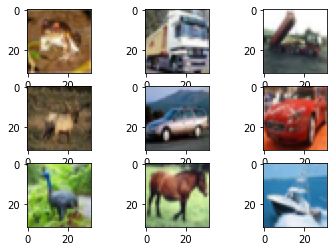

In [85]:
from tensorflow.keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i][:,::-1, :])

plt.show()

In [7]:
train_images[0].shape

(32, 32, 3)

In [92]:
n_data = 100
train_images = trainX[:n_data]
train_labels = pd.get_dummies(trainy[:n_data,0]).values
test_images = testX[:n_data]
test_labels = pd.get_dummies(testy[:n_data,0]).values
n_cls = train_labels.shape[1]

In [93]:
# Image augmentation via flip LR and Transpose
train_images = np.concatenate((train_images, train_images[:,:,::-1,:]), axis=0)
train_labels = np.concatenate((train_labels, train_labels), axis=0)

train_images = np.concatenate((train_images, np.swapaxes(train_images, 1, 2)), axis=0)
train_labels = np.concatenate((train_labels, train_labels), axis=0)


In [94]:
tf.compat.v1.disable_eager_execution()

tfph = tf.compat.v1.placeholder
tfvar = tf.compat.v1.get_variable

In [95]:
style = 'conv'

In [96]:
# # FC
# w = np.random.randn(n_in, n_hidden)
# W * W * 3 * W * W * 3
# 9e12

# # making the model locally connected
# W * W * 3 * (3 * 3 * 3)
# 1e8

# # using parameter sharing
# input: 3 x 3 x 3
# output: 3 output filters
# 81 parameters
# realistically, since we have so few parameters, we wouldnt only learn 3 filters, maybe we learn 1000 filters

In [97]:
tf.compat.v1.reset_default_graph()
if style == 'fc':
    img_ph = tfph(shape = (None, 32*32*3), dtype = tf.float32)
else:
    img_ph = tfph(shape = (None, 32, 32, 3), dtype = tf.float32)
features = img_ph
for i in range(3):
    if style == 'conv':
        features = tf.compat.v1.layers.conv2d(features, 64, (3, 3), padding = 'SAME')
    if style == 'lc':
        features = tf.keras.layers.LocallyConnected2D(3, (3, 3), padding = 'valid')(features)
    if style == 'fc':
        features = tf.compat.v1.layers.dense(features, 64 * 64 * 1)
    features = tf.nn.leaky_relu(features)
if style != 'fc':
    linear_features = tf.keras.layers.Flatten()(features)
else:
    linear_features = features
yhat_raw = tf.compat.v1.layers.Dense(n_cls)(linear_features)
yhat = tf.nn.softmax(yhat_raw, axis=1)
y_true = tfph(shape = (None, n_cls), dtype = tf.float32)
ce_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = yhat_raw, axis=1))
reg_loss = tf.reduce_sum([tf.reduce_sum(tf.square(v)) for v in tf.compat.v1.trainable_variables()])
loss = ce_loss + reg_loss * 1e-6 # For now, disabling regularization.
opt = tf.compat.v1.train.AdamOptimizer().minimize(loss)
# opt = tf.compat.v1.train.MomentumOptimizer(1e-3, .9, use_nesterov=True).minimize(loss)
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

C:\Users\leedt\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
C:\Users\leedt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [98]:
batch_fd = {img_ph: train_images, y_true: train_labels}
if style == 'fc':
    batch_fd[img_ph] = train_images.reshape(-1, 32*32*3)

valid_fd = {img_ph: test_images}
tst_argmax = test_labels.argmax(1)

In [99]:
train_argmax = train_labels.argmax(1)
pred_argmax = sess.run(yhat, batch_fd).argmax(1)
acc = (pred_argmax == train_argmax).mean()
acc

0.065

In [100]:

accs = []

0.042842373
test acc 0.12
0.20878997
test acc 0.11
0.0014976346
test acc 0.13
0.00018575409
test acc 0.15
0.13724032
test acc 0.13
0.0008004078
test acc 0.17
0.7802535
test acc 0.14
0.00018691702
test acc 0.16
0.0001910705
test acc 0.14
0.00018728763
test acc 0.12
6.2663627
test acc 0.14
0.00018759783
test acc 0.16
0.8409354
test acc 0.15
0.00039440318
test acc 0.09
0.00019735971
test acc 0.14
0.0006412488
test acc 0.15
0.0034781867
test acc 0.16
0.00018871493
test acc 0.14
0.0009383264
test acc 0.09
0.00018953359
test acc 0.11
0.00018963711
test acc 0.14
0.00019981165
test acc 0.12
0.0001896871
test acc 0.12
0.00022701045
test acc 0.12
0.00022913363
test acc 0.17
0.0024585081
test acc 0.18
0.00019005446
test acc 0.19
0.00019020667
test acc 0.18
0.00020754902
test acc 0.15
0.11953455
test acc 0.17
0.07722357
test acc 0.15
0.00031639438
test acc 0.16
0.0001910405
test acc 0.15
0.0014488647
test acc 0.11
1.0063856
test acc 0.12
0.00028898046
test acc 0.19
5.918376
test acc 0.11
0.0001951

0.0017828943
test acc 0.09
0.0017831066
test acc 0.09
0.001783397
test acc 0.07
0.001783476
test acc 0.08
0.0017835163
test acc 0.09
0.0017836549
test acc 0.11
0.0017837187
test acc 0.11
0.0017837429
test acc 0.11
0.0017837514
test acc 0.11
0.0017837547
test acc 0.11
0.0017837556
test acc 0.11
0.0017837558
test acc 0.11
0.001783756
test acc 0.11
0.001783756
test acc 0.11
0.0017836882
test acc 0.09
0.0017838619
test acc 0.09
0.0017839607
test acc 0.08
0.0017839998
test acc 0.08
0.0017840142
test acc 0.08
0.0017840192
test acc 0.08
0.001784021
test acc 0.08
0.0017840216
test acc 0.08
0.0017840217
test acc 0.08
0.0017840217
test acc 0.08
0.0017847109
test acc 0.11
0.0017853982
test acc 0.09
0.0017863788
test acc 0.08
0.0017870824
test acc 0.08
0.0017873733
test acc 0.08
0.0017874805
test acc 0.08
0.0017875191
test acc 0.08
0.0017875324
test acc 0.09
0.0017875369
test acc 0.09
0.0017875385
test acc 0.09
0.0017873822
test acc 0.13
0.001787442
test acc 0.11
0.0017876303
test acc 0.12
0.00178

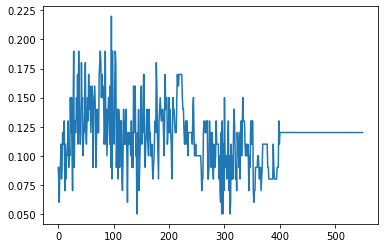

In [102]:

for i in range(500):
    samples = np.random.choice(train_images.shape[0], size = 4, replace = False)
    _, cur_loss = sess.run([opt, loss], {img_ph: train_images[samples], y_true: train_labels[samples]})
    if i % 10 == 0:
        print(cur_loss)
        predictions = sess.run(yhat, valid_fd)
        pred_argmax = predictions.argmax(1)
        acc = (pred_argmax == tst_argmax).mean()
        accs.append(acc)
        print('test acc', acc)
plt.plot(accs)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(pred_argmax, tst_argmax)

array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [2, 1, 1, 0, 0, 1, 2, 3, 2, 2],
       [1, 2, 3, 4, 0, 2, 4, 2, 0, 2],
       [3, 1, 0, 1, 2, 2, 1, 2, 2, 2],
       [0, 0, 1, 3, 1, 2, 5, 2, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 1, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 1, 0, 0, 0, 1],
       [2, 2, 0, 0, 1, 0, 0, 1, 9, 4]], dtype=int64)

<AxesSubplot:>

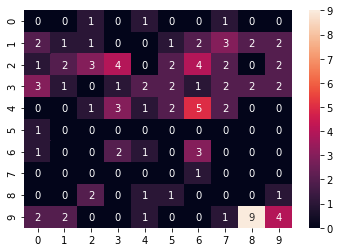

In [39]:
import seaborn as sns
sns.heatmap(confusion_matrix(pred_argmax, tst_argmax), annot=True)